<a href="https://colab.research.google.com/github/Paulina9555/Repo1/blob/master/klasyfikacja_zad_trenera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
from time import sleep
import pandas as pd
import numpy as np

In [ ]:
page_number = 1
url = f'https://nofluffjobs.com/pl/artificial-intelligence?criteria=category%3Ddata&page={page_number}'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)
content = response.text

In [ ]:
soup = BeautifulSoup(content)
print(soup.prettify())

In [ ]:
raw_data = soup.find('script', {'id': 'serverApp-state'}).get_text()

In [ ]:
raw_data = raw_data.replace('&q;','"')

In [ ]:
json_data = json.loads(raw_data)

In [ ]:
json_data

In [ ]:
offers = json_data['STORE_KEY']['searchResponse']['postings']

In [ ]:
offers[0]

In [ ]:
def get_page(url):
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
  response = requests.get(url, headers=headers)
  content = response.text
  sleep(1)
  return BeautifulSoup(content)


def get_offers(soup):
  raw_data = soup.find('script', {'id': 'serverApp-state'}).get_text().replace('&q;','"')
  json_data = json.loads(raw_data)
  return json_data['STORE_KEY']['searchResponse']['postings']


def parse_offer(offer):
  title = offer['title']
  url = offer['url']
  id = offer['id']
  seniority = offer['seniority'][0]
  salary_from = offer['salary']['from']
  salary_to = offer['salary']['to']
  salary_type = offer['salary']['type']
  salary_currency = offer['salary']['currency']
  return {'title': title,
          'url': url,
          'id': id,
          'seniority': seniority,
          'salary_from': salary_from,
          'salary_to': salary_to,
          'salary_type': salary_type,
          'salary_currency': salary_currency}

In [ ]:
data = []
for page_number in range(1,9):
  url = f'https://nofluffjobs.com/pl/artificial-intelligence?criteria=category%3Ddata&page={page_number}'
  soup = get_page(url)
  offers = get_offers(soup)
  for offer in offers:
    data.append(parse_offer(offer))
  print(f'Obtained data from page {page_number}')

Obtained data from page 1
Obtained data from page 2
Obtained data from page 3
Obtained data from page 4
Obtained data from page 5
Obtained data from page 6
Obtained data from page 7
Obtained data from page 8


In [ ]:
len(data)

159

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['salary_currency'].value_counts()

PLN    158
Name: salary_currency, dtype: int64

In [ ]:
df.to_csv('nf.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            159 non-null    object
 1   url              159 non-null    object
 2   id               159 non-null    object
 3   seniority        159 non-null    object
 4   salary_from      159 non-null    int64 
 5   salary_to        159 non-null    int64 
 6   salary_type      159 non-null    object
 7   salary_currency  159 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.1+ KB


In [ ]:
df.describe()

,salary_from,salary_to
count,158.000000,158.000000
mean,19183.139241,25758.930380
std,8334.388475,11569.650298
min,3227.000000,4000.000000
25%,14000.000000,20160.000000
50%,19892.000000,25100.000000
75%,23520.000000,30000.000000
max,74000.000000,119000.000000


In [ ]:
df.describe()

,salary_from,salary_to
count,159.000000,159.000000
mean,19051.817610,25579.547170
std,8311.689584,11632.882576
min,3164.000000,4000.000000
25%,14000.000000,19955.000000
50%,19320.000000,25200.000000
75%,23310.000000,30000.000000
max,74000.000000,119000.000000


In [ ]:
df = df[df['salary_from'] < 50000]

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

<ipython-input-21-a9076f75cd88>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data = df,


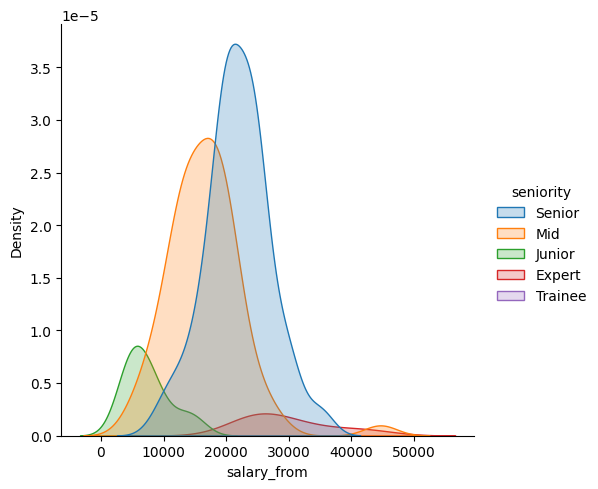

In [ ]:
ax = sns.displot(data = df,
                 x='salary_from',
                 hue='seniority',
                 kind='kde',
                 fill=True)

<ipython-input-22-5a69cd6e7b7a>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data = df,


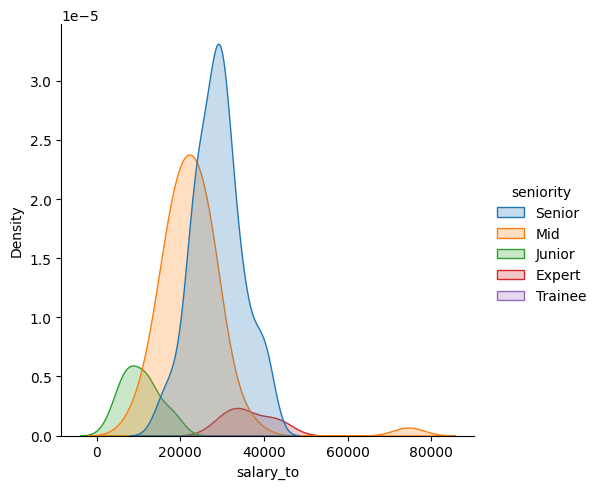

In [ ]:
ax = sns.displot(data = df,
                 x='salary_to',
                 hue='seniority',
                 kind='kde',
                 fill=True)

# Metryki klasyfikacji

In [ ]:
df['seniority'].value_counts()

Senior     74
Mid        64
Junior     12
Expert      6
Trainee     1
Name: seniority, dtype: int64

In [ ]:
y_sample = df.sample(100)['seniority']
y_sample = np.where((y_sample == 'Senior') | (y_sample == 'Expert'), 1, 0)

In [ ]:
y_sample

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

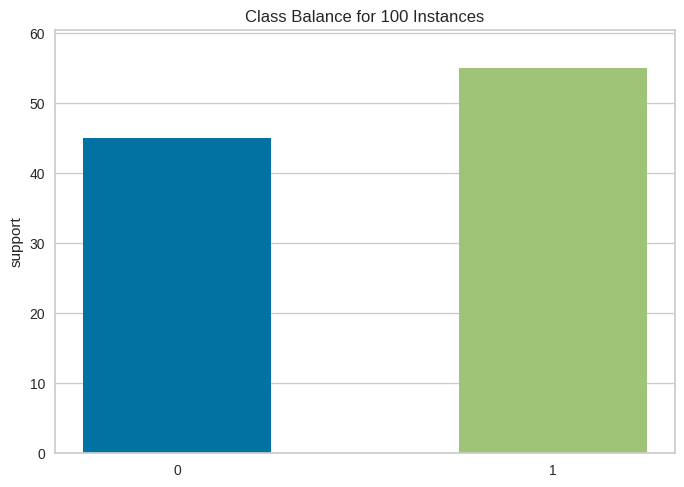

<Axes: title={'center': 'Class Balance for 100 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()

visualizer.fit(y_sample)
visualizer.show()

In [ ]:
y_sample

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
y_pred = np.random.randint(0,2,len(y_sample))

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

## Macierz błędów

In [ ]:
def confusion_matrix(truth, predictions):
  tp, tn, fp, fn = 0, 0, 0, 0
  for label, predicted in zip(truth, predictions):
    if label == predicted:
      if predicted: #predicted == 1
        tp += 1 # tp = tp + 1
      else:
        tn += 1
    else:
      if predicted:
        fp += 1
      else:
        fn += 1
  return tp, tn, fp, fn

In [ ]:
confusion_matrix(y_sample, y_pred)

(28, 22, 23, 27)

## Accuracy

In [ ]:
def accuracy(truth, predictions):
  tp, tn, fp, fn = confusion_matrix(truth, predictions)
  return (tp+tn)/(tp+tn+fp+fn)

In [ ]:
def accuracy(truth, predictions):
    return sum(truth == predictions) / len(truth)

## Recall

In [ ]:
def recall(truth, predictions):
  tp, tn, fp, fn = confusion_matrix(truth, predictions)
  return tp /(tp+fn)

## Precission

In [ ]:
def precision(truth, predictions):
  tp, tn, fp, fn = confusion_matrix(truth, predictions)
  return tp /(tp+fp)

## F1-Score

In [ ]:
def f1score(truth, predictions):
  prec = precision(truth, predictions)
  rec = recall(truth, predictions)
  return 2 * prec * rec / (prec + rec)

## Metryki jakości w sklearn

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
def calculate_metrics(y_truth, y_pred):
  print('Accuracy:\t', round(accuracy_score(y_truth, y_pred),2))
  print('Recall:\t\t', round(recall_score(y_truth, y_pred),2))
  print('Precision:\t', round(precision_score(y_truth, y_pred),2))
  print('F1:\t\t', round(f1_score(y_truth, y_pred),2))

In [ ]:
calculate_metrics(y_sample, y_pred)

Accuracy:	 0.5
Recall:		 0.51
Precision:	 0.55
F1:		 0.53


In [ ]:
cfm = confusion_matrix(y_sample, y_pred)

<Axes: >

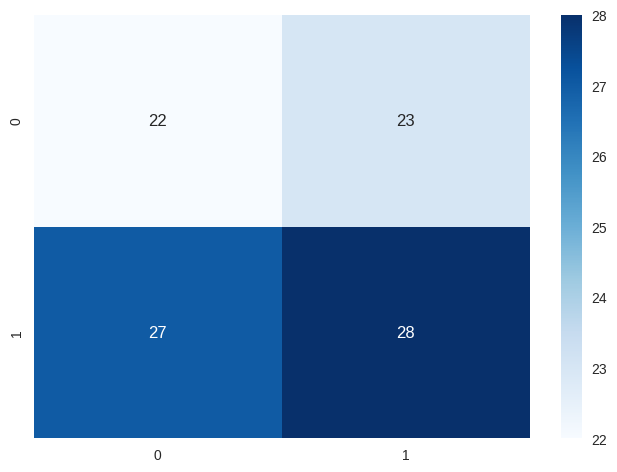

In [ ]:
sns.heatmap(cfm, annot=True, cmap='Blues')

# Modele

In [ ]:
X = df[['salary_from', 'salary_to']]
y = df['seniority']

In [ ]:
y = np.where((y == 'Senior') | (y == 'Expert'), 1, 0)

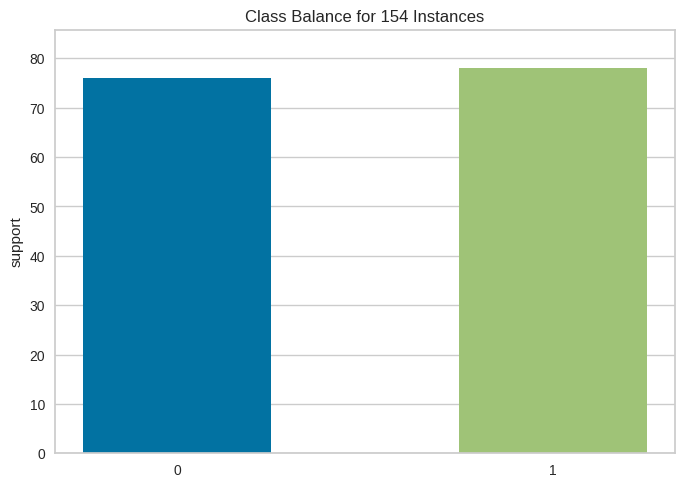

<Axes: title={'center': 'Class Balance for 154 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()

visualizer.fit(y)
visualizer.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y)

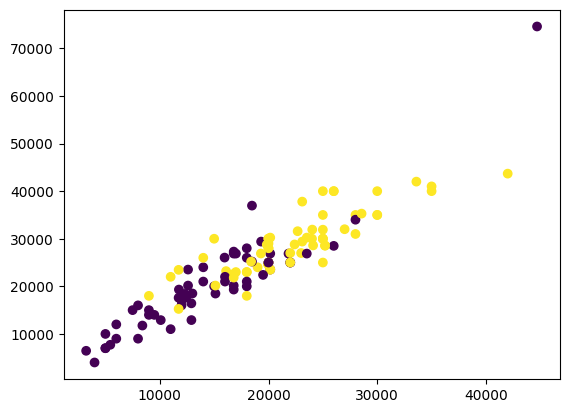

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('default')

plt.scatter(X_train['salary_from'],
            X_train['salary_to'],
            c=y_train)
plt.show()

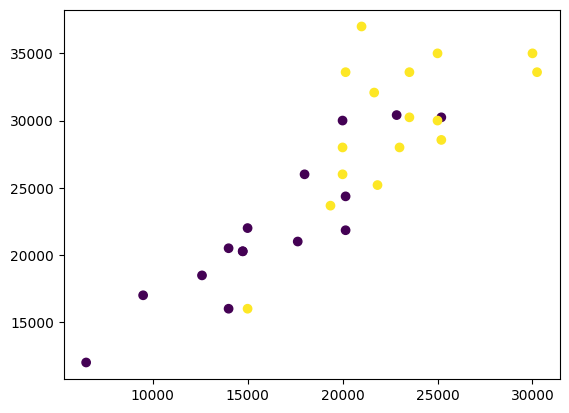

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('default')

plt.scatter(X_test['salary_from'],
            X_test['salary_to'],
            c=y_test)
plt.show()

## Regresja logistyczna

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
y_train_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
lr.predict_proba(X_train)

In [ ]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	 0.57
Recall:		 0.89
Precision:	 0.54
F1:		 0.67


In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
calculate_metrics(y_test, y_test_pred)

Accuracy:	 0.52
Recall:		 0.88
Precision:	 0.52
F1:		 0.65


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.25      0.36        61
           1       0.54      0.89      0.67        62

    accuracy                           0.57       123
   macro avg       0.61      0.57      0.52       123
weighted avg       0.61      0.57      0.52       123



In [ ]:
from scipy.ndimage import label
def plot_decission_area(estimator, X, y, threshold=0.5, binary=True):

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000),
                         np.linspace(x2_min, x2_max, 1000))

    predicted = estimator.predict_proba(np.column_stack((x1.flatten(),
                                            x2.flatten())))[:,1].reshape(x1.shape)
    if binary:
      predicted = np.where(predicted >= threshold, 1, 0)

    fig, ax = plt.subplots()
    pc = ax.pcolormesh(x1, x2, predicted)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    if not binary:
      plt.colorbar(pc)

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


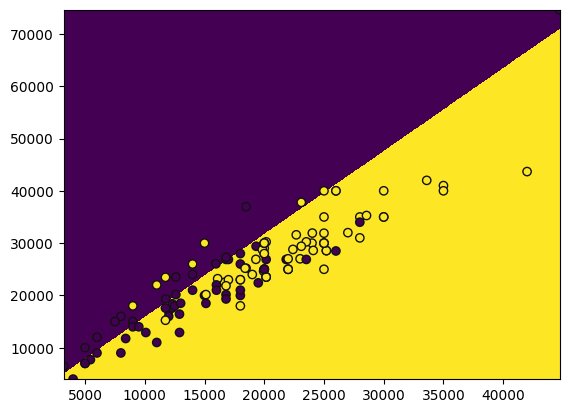

In [ ]:
plot_decission_area(lr, X_train.values, y_train)

### Standaryzacja

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train_std)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73        61
           1       0.73      0.77      0.75        62

    accuracy                           0.74       123
   macro avg       0.74      0.74      0.74       123
weighted avg       0.74      0.74      0.74       123



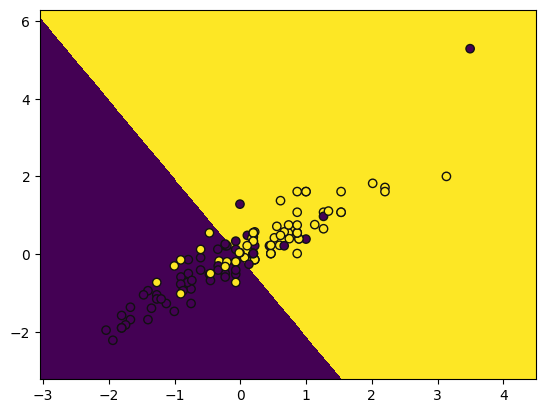

In [ ]:
plot_decission_area(lr, X_train_std, y_train)

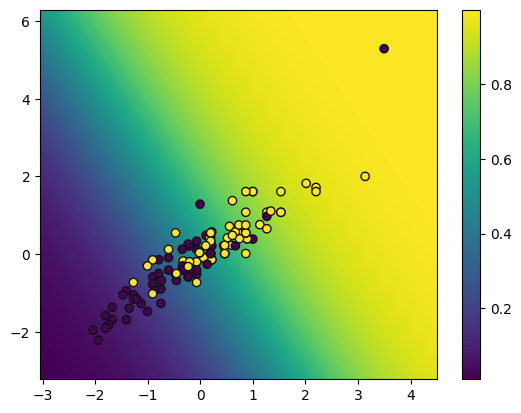

In [ ]:
plot_decission_area(lr, X_train_std, y_train, binary=False)

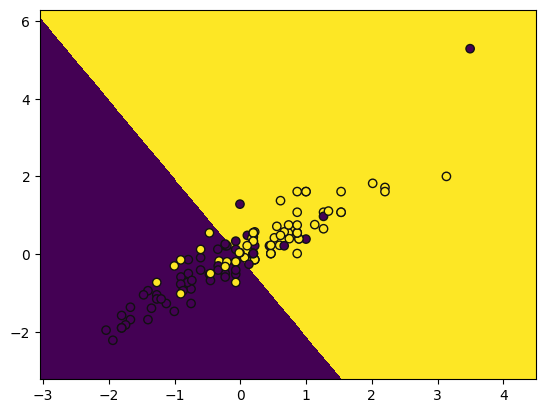

In [ ]:
plot_decission_area(lr, X_train_std, y_train, threshold=0.5)

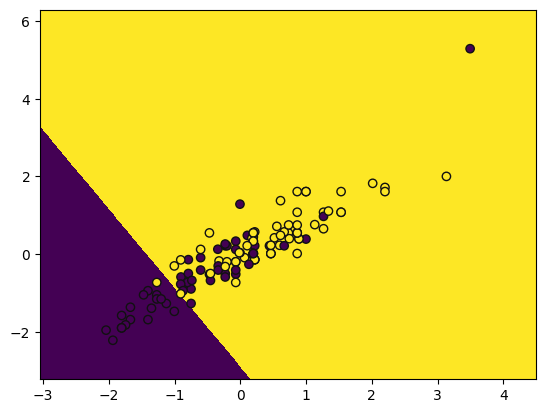

In [ ]:
plot_decission_area(lr, X_train_std, y_train, threshold=0.2)

In [ ]:
X_test_std = sc.transform(X_test)

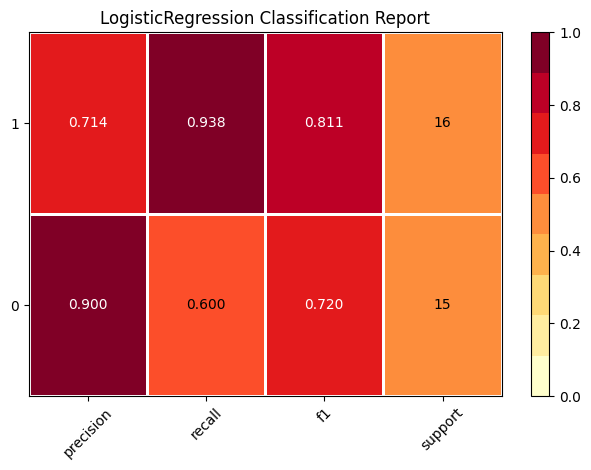

In [ ]:
from yellowbrick.classifier import classification_report

visualizer = classification_report(
    lr, X_train_std, y_train, X_test_std, y_test, support=True
)

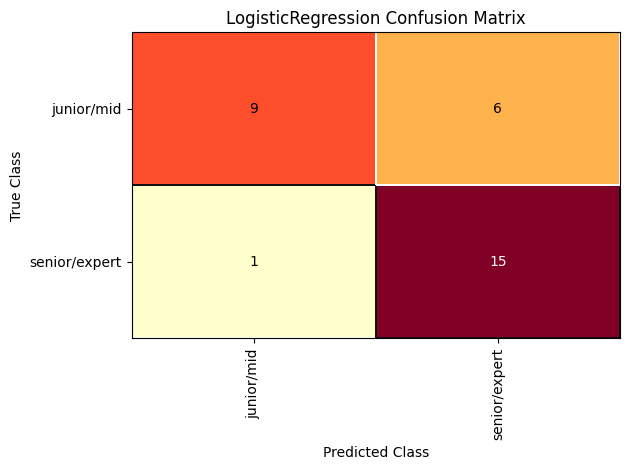

<Figure size 640x480 with 0 Axes>

In [ ]:
from yellowbrick.classifier import confusion_matrix

# Instantiate the visualizer with the classification model
confusion_matrix(
    lr,
    X_train_std, y_train, X_test_std, y_test,
    classes=['junior/mid', 'senior/expert']
)
plt.tight_layout()

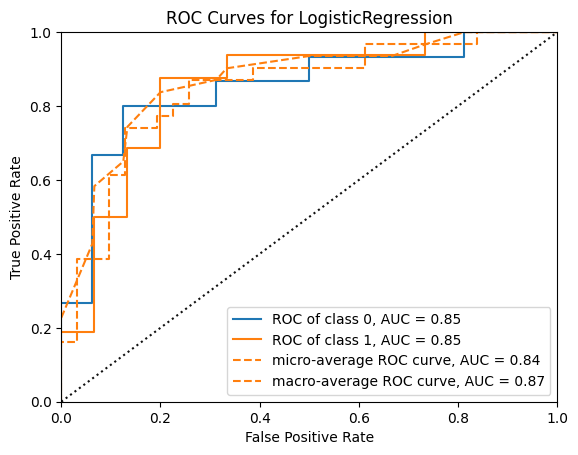

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression())

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc


# Instantiate the visualizer with the classification model
roc_auc(lr, X_train_std, y_train, X_test_std, y_test)

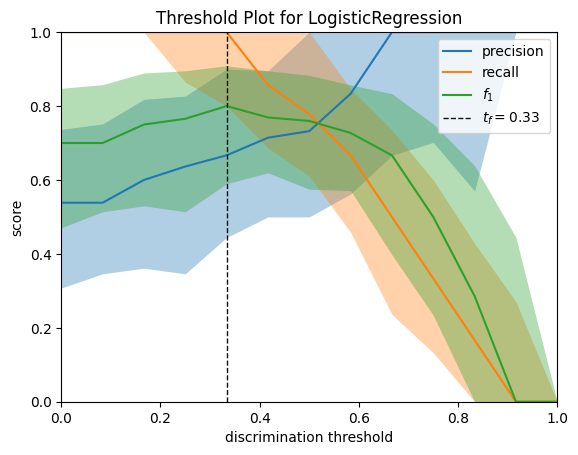

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:

from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(lr, exclude='queue_rate')

visualizer.fit(X_train_std, y_train)        # Fit the data to the visualizer
visualizer.show()

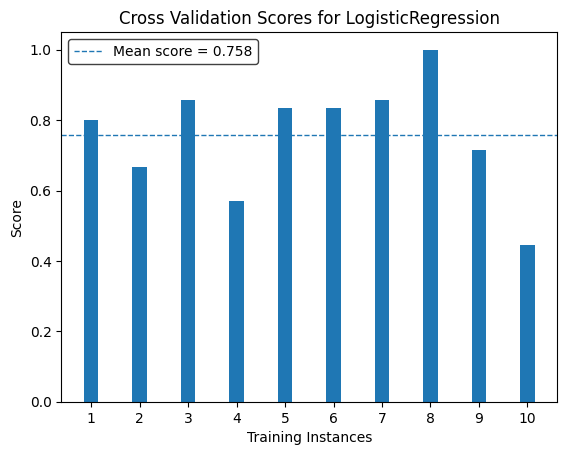

In [ ]:
from yellowbrick.model_selection import cv_scores

# Instantiate the regression model and visualizer

visualizer = cv_scores(lr, X_train_std, y_train, cv=10, scoring='precision')

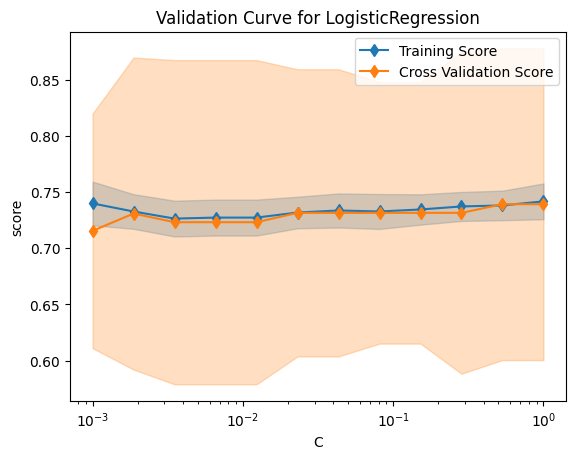

In [ ]:
import numpy as np
from yellowbrick.model_selection import validation_curve

viz = validation_curve(
    lr,
    X_train_std,
    y_train,
    param_name="C",
    param_range=np.logspace(-3, 0, 12),
    cv=10,
    logx = True
)

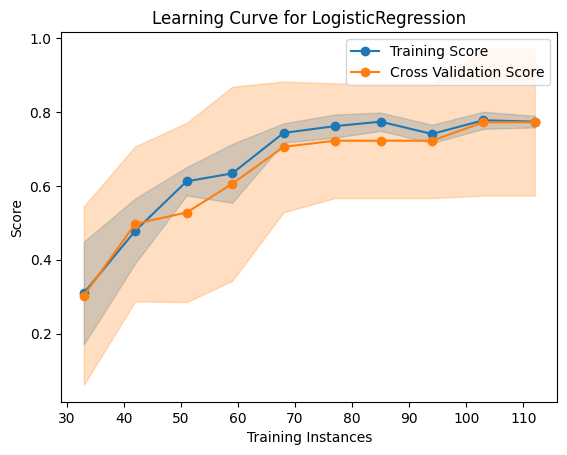

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve


sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    lr,
    cv=12, scoring='recall',
    train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_std, y_train)        # Fit the data to the visualizer
visualizer.show()

## Regresja logistyczna wielomianowa

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('sc', StandardScaler()),
                 ('poly', PolynomialFeatures(degree=7, include_bias=False)),
                 ('lr', LogisticRegression())
                 ])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('sc', StandardScaler()),
                ('poly', PolynomialFeatures(degree=7, include_bias=False)),
                ('lr', LogisticRegression())])

In [ ]:
y_train_pred = pipe.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        58
           1       0.78      0.85      0.81        61

    accuracy                           0.80       119
   macro avg       0.80      0.80      0.80       119
weighted avg       0.80      0.80      0.80       119



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


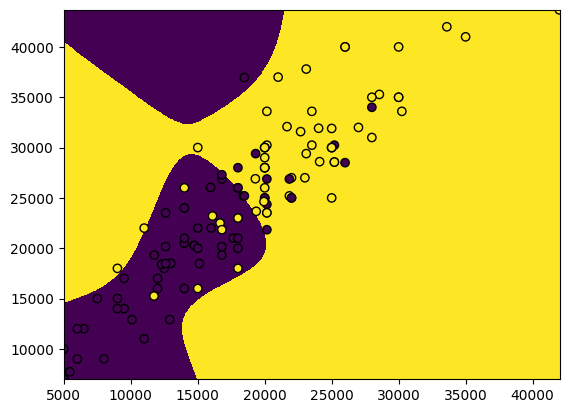

In [ ]:
plot_decission_area(pipe, X_train.values, y_train, threshold=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "poly__degree": np.arange(1,8),
    "lr__C": np.logspace(-4, 4, 4),
}

In [ ]:
gs = GridSearchCV(pipe,
                  param_grid,
                  n_jobs=4,
                  cv=5,
                  verbose=2,
                  scoring = 'f1')

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=7,
                                                           include_bias=False)),
                                       ('lr', LogisticRegression())]),
             n_jobs=4,
             param_grid={'lr__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'poly__degree': array([1, 2, 3, 4, 5, 6, 7])},
             scoring='f1', verbose=2)

In [ ]:
y_train_pred = gs.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.74        58
           1       0.73      0.85      0.79        61

    accuracy                           0.76       119
   macro avg       0.77      0.76      0.76       119
weighted avg       0.77      0.76      0.76       119



In [ ]:
gs.best_params_

{'lr__C': 21.54434690031882, 'lr__penalty': 'l2', 'poly__degree': 1}

## SVM/SVC

## Kernel liniowy

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('svc', SVC(kernel='linear', probability=True))
                 ])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

In [ ]:
y_train_pred = pipe.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


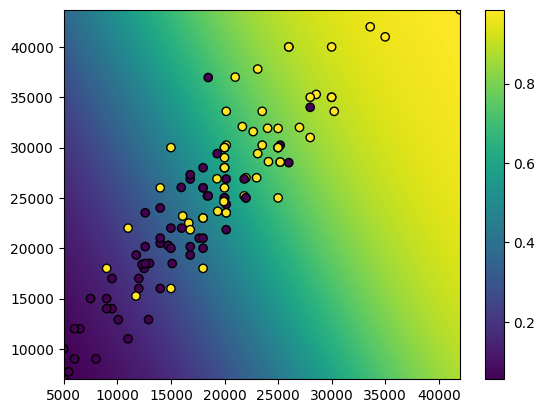

In [ ]:
plot_decission_area(pipe, X_train.values, y_train, binary=False, threshold=0.5)

In [ ]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('lr', LogisticRegression())
                 ])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


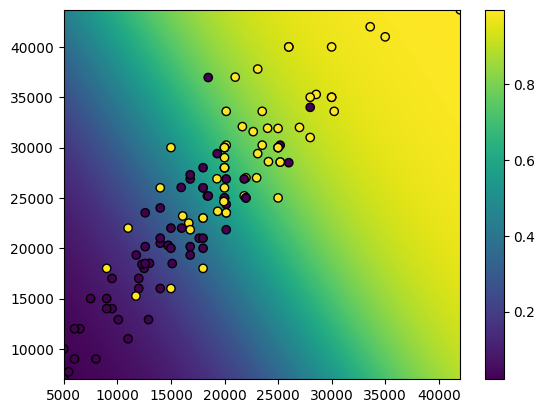

In [ ]:
plot_decission_area(pipe, X_train.values, y_train, binary=False, threshold=0.5)

## Kernel wielomianowy

In [ ]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('svc', SVC(kernel='poly', probability=True))
                 ])

In [ ]:
param_grid = {
    "svc__degree": np.arange(1,6),
    "svc__C": np.logspace(-4, 4, 4)
}

In [ ]:
gs = GridSearchCV(pipe,
                  param_grid,
                  n_jobs=4,
                  cv=5,
                  verbose=2,
                  scoring = 'f1')

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('svc',
                                        SVC(kernel='poly', probability=True))]),
             n_jobs=4,
             param_grid={'svc__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'svc__degree': array([1, 2, 3, 4, 5])},
             scoring='f1', verbose=2)

In [ ]:
y_train_pred = gs.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


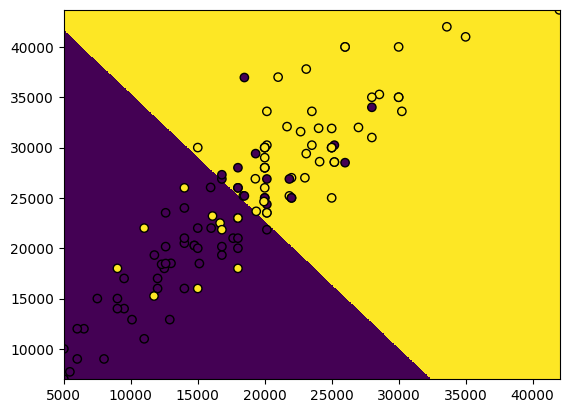

In [ ]:
plot_decission_area(gs, X_train.values, y_train, binary=True, threshold=0.5)

In [ ]:
gs.best_params_

{'svc__C': 0.046415888336127774, 'svc__degree': 1}

## Kernel RBF

In [ ]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('svc', SVC(kernel='rbf', probability=True))
                 ])

In [ ]:
param_grid = {
    "svc__gamma": np.arange(1,6),
    "svc__C": np.logspace(-4, 4, 4)
}

In [ ]:
gs = GridSearchCV(pipe,
                  param_grid,
                  n_jobs=4,
                  cv=5,
                  verbose=2,
                  scoring = 'f1')

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=4,
             param_grid={'svc__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'svc__gamma': array([1, 2, 3, 4, 5])},
             scoring='f1', verbose=2)

In [ ]:
y_train_pred = gs.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


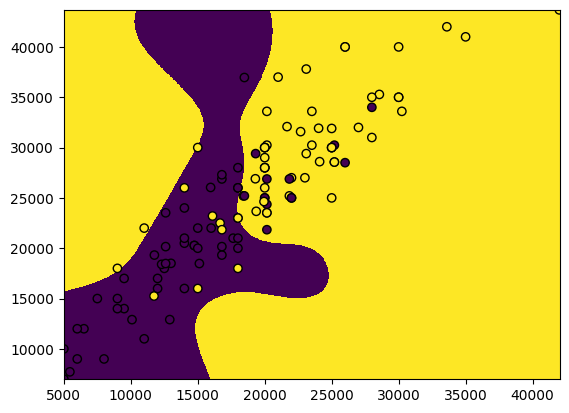

In [ ]:
plot_decission_area(gs, X_train.values, y_train, binary=True, threshold=0.5)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.81      0.84      0.82        61

    accuracy                           0.82       119
   macro avg       0.82      0.81      0.81       119
weighted avg       0.82      0.82      0.81       119



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=50))
                 ])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=50))])

In [ ]:
y_train_pred = pipe.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        58
           1       0.75      0.80      0.78        61

    accuracy                           0.76       119
   macro avg       0.77      0.76      0.76       119
weighted avg       0.77      0.76      0.76       119



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


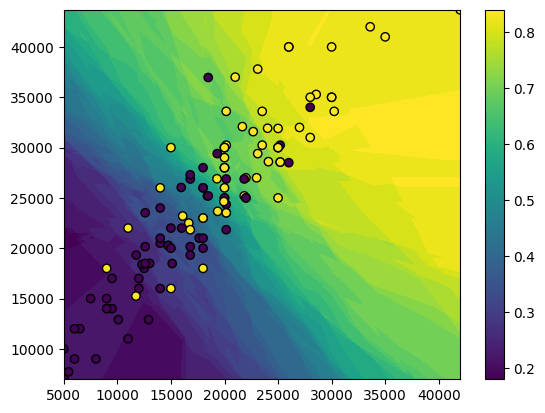

In [ ]:
plot_decission_area(pipe, X_train.values, y_train, binary=False, threshold=0.5)

In [ ]:
pipe = Pipeline([('sc', StandardScaler()),
                 ('knn', KNeighborsClassifier())
                 ])

In [ ]:
param_grid = {
    "knn__n_neighbors": np.arange(3,25,5),
    "knn__weights": ['uniform', 'distance']
}

In [ ]:
gs = GridSearchCV(pipe,
                  param_grid,
                  n_jobs=4,
                  cv=5,
                  verbose=3,
                  scoring = 'f1')

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=4,
             param_grid={'knn__n_neighbors': array([ 3,  8, 13, 18, 23]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [ ]:
y_train_pred = gs.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.72        58
           1       0.72      0.80      0.76        61

    accuracy                           0.74       119
   macro avg       0.74      0.74      0.74       119
weighted avg       0.74      0.74      0.74       119



In [ ]:
gs.best_params_

{'knn__n_neighbors': 23, 'knn__weights': 'uniform'}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


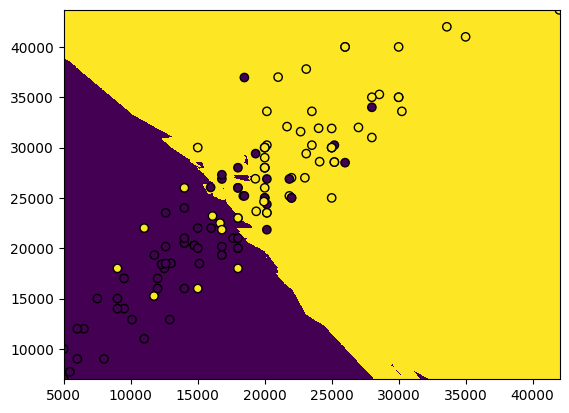

In [ ]:
plot_decission_area(gs, X_train.values, y_train, binary=True, threshold=0.5)

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df[['salary_from', 'salary_to']]
y = df['seniority']
y = np.where((y == 'Senior') | (y == 'Expert'), 1, 0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('sc', StandardScaler()),
                 ('gnb', GaussianNB())
                 ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('gnb', GaussianNB())])

In [ ]:
y_train_pred = pipe.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70        61
           1       0.71      0.78      0.74        65

    accuracy                           0.72       126
   macro avg       0.72      0.72      0.72       126
weighted avg       0.72      0.72      0.72       126



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


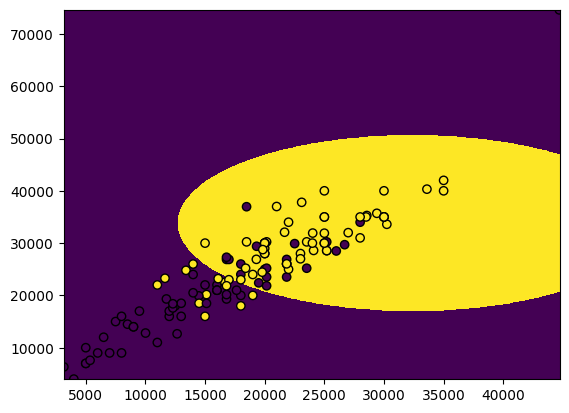

In [ ]:
plot_decission_area(pipe, X_train.values, y_train)

In [ ]:
y_test_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.68      0.88      0.77        17

    accuracy                           0.72        32
   macro avg       0.74      0.71      0.70        32
weighted avg       0.74      0.72      0.71        32



## Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


pipe = Pipeline([('sc', MinMaxScaler()),
                 ('mnb', MultinomialNB())
                 ])

pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', MinMaxScaler()), ('mnb', MultinomialNB())])

In [ ]:
y_train_pred = pipe.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.52      1.00      0.68        65

    accuracy                           0.52       126
   macro avg       0.26      0.50      0.34       126
weighted avg       0.27      0.52      0.35       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


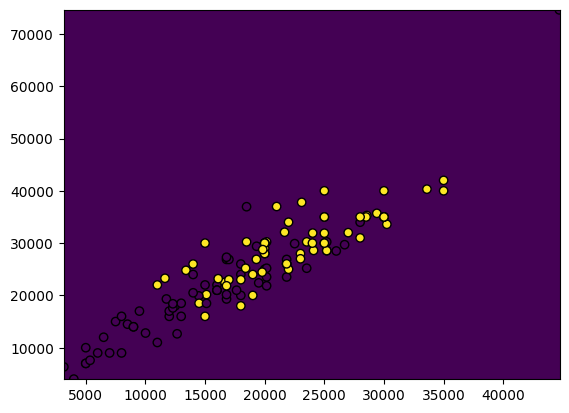

In [ ]:
plot_decission_area(pipe, X_train.values, y_train)

## Dyskretyzacja

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbin = KBinsDiscretizer(n_bins = 5,
                        strategy = 'quantile')

In [ ]:
X_train_disc = kbin.fit_transform(X_train)

In [ ]:
X_train_disc.toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
kbin.get_feature_names_out()

array(['salary_from_0.0', 'salary_from_1.0', 'salary_from_2.0',
       'salary_from_3.0', 'salary_from_4.0', 'salary_to_0.0',
       'salary_to_1.0', 'salary_to_2.0', 'salary_to_3.0', 'salary_to_4.0'],
      dtype=object)

In [ ]:
kbin.bin_edges_

array([array([ 3164., 12500., 16800., 20000., 25000., 44700.]),
       array([ 4000., 18000., 23000., 27300., 31000., 74600.])],
      dtype=object)

In [ ]:
16800-12500.

4300.0

## Drzewa decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        61
           1       0.86      0.91      0.88        65

    accuracy                           0.87       126
   macro avg       0.87      0.87      0.87       126
weighted avg       0.87      0.87      0.87       126



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


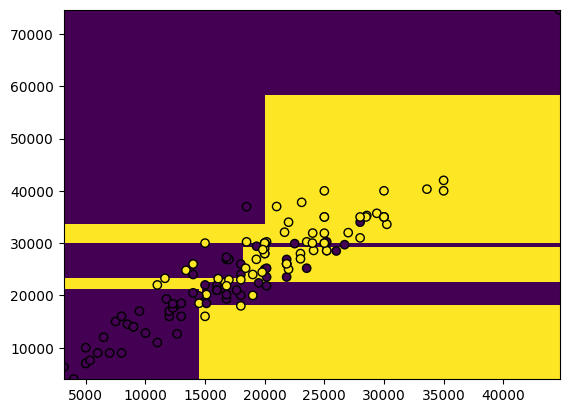

In [ ]:
plot_decission_area(dtc, X_train.values, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "max_depth": np.arange(2,5),
    "min_samples_split": np.arange(2,10),
    "min_samples_leaf": np.arange(2,10),
}

In [ ]:
gs = GridSearchCV(dtc,
                  param_grid,
                  n_jobs=4,
                  cv=5,
                  verbose=3,
                  scoring = 'f1')

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=4,
             param_grid={'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1', verbose=3)

In [ ]:
gs.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

## Bagging (Bootstrap aggregation)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg = BaggingClassifier(estimator=DecisionTreeClassifier(),
                       n_estimators=100)

In [ ]:
bg.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
y_train_pred = bg.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.98      0.98      0.98        65

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [ ]:
y_test_pred = bg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.79      0.65      0.71        17

    accuracy                           0.72        32
   macro avg       0.73      0.72      0.72        32
weighted avg       0.73      0.72      0.72        32



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

param_grid = {
    "max_depth": np.arange(2,5),
    "min_samples_split": np.arange(2,10),
    "min_samples_leaf": np.arange(2,10),
    "n_estimators": [10,20,30]
}

In [ ]:
gs = GridSearchCV(rfc,
                  param_grid,
                  n_jobs=4,
                  cv=5,
                  verbose=3,
                  scoring = 'f1')

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [10, 20, 30]},
             scoring='f1', verbose=3)

In [ ]:
y_train_pred = gs.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72        61
           1       0.72      0.86      0.78        65

    accuracy                           0.75       126
   macro avg       0.77      0.75      0.75       126
weighted avg       0.76      0.75      0.75       126



In [ ]:
y_test_pred = gs.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.68      0.88      0.77        17

    accuracy                           0.72        32
   macro avg       0.74      0.71      0.70        32
weighted avg       0.74      0.72      0.71        32



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


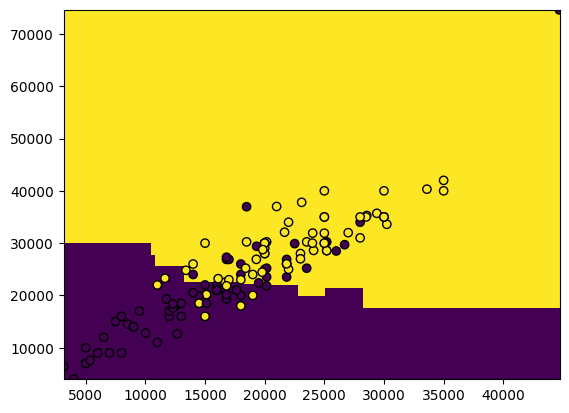

In [ ]:
plot_decission_area(gs, X_train.values, y_train)

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(),
                         n_estimators=10)

In [ ]:
abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)

In [ ]:
y_train_pred = gs.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72        61
           1       0.72      0.86      0.78        65

    accuracy                           0.75       126
   macro avg       0.77      0.75      0.75       126
weighted avg       0.76      0.75      0.75       126

